In [ ]:
!apt-get install nvidia-cuda-toolkit
!pip3 install numba
!pip install wurlitzer
!pip install orca

# git repo setup

In [4]:
# !rm parallelized-PSO-clustering -r
!git clone https://ms03831:hahaha:D1985764@github.com/ms03831/parallelized-PSO-clustering
!git config --global user.email "ms03831@st.habib.edu.pk"
!git config --global user.name "ms03831"

Cloning into 'parallelized-PSO-clustering'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 215 (delta 119), reused 130 (delta 46), pack-reused 0
Receiving objects: 100% (215/215), 1.70 MiB | 31.68 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
# %cd /content/parallelized-PSO-clustering/
# %cd Code/
# %mkdir pso
# %cd pso
# %ls
# %cd Code/kmeans
%cp ../../../drive/MyDrive/Colab\ Notebooks/pso* .
#%cp ../../../drive/MyDrive/Colab\ Notebooks/kmeans* .

cp: cannot stat '../../../drive/MyDrive/Colab Notebooks/pso*': No such file or directory


In [29]:
!git add .
!git commit -m "pso files adding"
!git push origin main

[main 4ee2372] pso files adding
 9 files changed, 163 insertions(+), 3 deletions(-)
 delete mode 100644 Code/pso/pso/psoCUDA-gridstride-updateparallel.ipynb
 delete mode 100644 Code/pso/pso/psoCUDA-naive-with-cpu-profile.ipynb
 delete mode 100644 Code/pso/pso/psoCUDA-update-parallel.ipynb
 create mode 100644 Code/pso/pso_cpu.py
 create mode 100644 Code/pso/pso_gpu_grid_stride.py
 create mode 100644 Code/pso/pso_gpu_shared_memory.py
 create mode 100644 Code/pso/pso_gpu_simple.py
 create mode 100644 Code/pso/pso_gpu_update.py
 create mode 100644 Code/pso/pso_utils.py
Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (7/7), 1.98 KiB | 1.98 MiB/s, done.
Total 7 (delta 2), reused 1 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/ms03831/parallelized-PSO-clustering
   5dca174..4ee2372  main -> main


In [ ]:
!git add kmeans_gpu.py
!git commit -m commitmsg
!git push origin main

# Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy as np
import random 
import pso_cpu, pso_gpu_shared_memory, pso_utils, pso_gpu_simple, pso_gpu_update, pso_gpu_grid_stride
import importlib

In [23]:
importlib.reload(pso_cpu)
importlib.reload(pso_utils)
importlib.reload(pso_gpu_simple)
importlib.reload(pso_gpu_update)
importlib.reload(pso_gpu_grid_stride)
importlib.reload(pso_gpu_shared_memory)

<module 'pso_gpu_shared_memory' from '/content/parallelized-PSO-clustering/Code/pso/pso_gpu_shared_memory.py'>

In [27]:
from pso_utils import initializePoints, getPointsFromDataDigits, getPointsFromDataIris
#seeding and data generation
random_state = 20
np.random.seed(random_state)
random.seed(random_state)

K = 5
N = 50
points = initializePoints(N, K)
#points, labels, K = getPointsFromDataDigits()
#points, labels, K = getPointsFromDataIris()

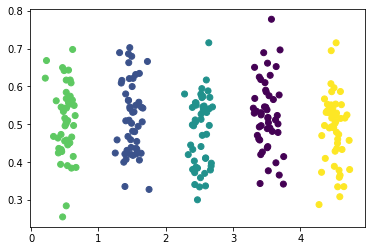

In [28]:
seed = 20
random.seed(seed)
np.random.seed(seed)
particles = 10
iterations = 100
w = 0.99
c1 = 0.15
c2 = 0.2

BLOCKDIM = 64
DATADIM = 2
pso_cpu.main_pso_cpu(points, K, random_state, DATADIM, BLOCKDIM, particles, iterations, w, c1, c2)

In [ ]:
from utils import initializePoints, getPointsFromDataDigits, getPointsFromDataIris
#seeding and data generation
seed = 20
np.random.seed(seed)
random.seed(seed)

K = 20
N = 10000
points = initializePoints(N, K)
#points, labels, K = getPointsFromDataDigits()
#points, labels, K = getPointsFromDataIris()

In [ ]:
from kmeans_cpu import main_kmeans_cpu
import time
start = time.time()
main_kmeans_cpu(points, K, seed)
end = time.time() 
print("time taken ", end - start)

The score of best Kmeans clustering is: 1001.4177464403713


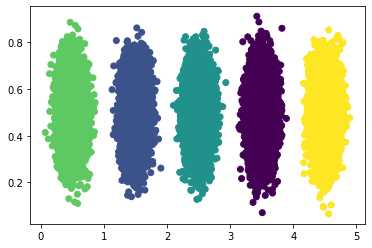

In [ ]:
### benchmarking
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=K, random_state=seed).fit(points)
y_predict = kmeans.predict(points)

print(f"The score of best Kmeans clustering is: {np.abs(kmeans.score(points))}")
plt.scatter(points[:, 0], points[:, 1], c = y_predict)
plt.show()    

In [ ]:
from kmeans_gpu import main_kmeans_gpu
import time
start = time.time()
main_kmeans_gpu(points, K, seed)
end = time.time() 
print("time taken ", end - start)

The score of best Kmeans clustering is: 1001.4177474801841
time taken  0.7284762859344482
